In [1]:
%%javascript
IPython.OutputArea.prototype._should_scroll = function(lines) {
    return false;
}

<IPython.core.display.Javascript object>

In [2]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

In [42]:
import numpy as np
import glob
from astropy.io import fits
import matplotlib.pylab as plt
import pandas as pd
import astropy.units as u
from scipy import interpolate

# Read Omni

In [28]:
columns = ['Year',
           'Day',
           'Hour',
           'Bartels Rot',
           'IDIMF',
           'IDSW',
           'Points in IMF av', 
           'Points in plasma av',
           '|B|', ###
           'B', 
           'B Lat',
           'B Long',
           'Bx GSE,GSM',
           'By GSE',
           'Bz GSE',
           'By GSM',
           'Bz GSM',
           'sigma|B|',
           'sigma B',
           'sigma Bx GSE',
           'sigma By GSE',
           'sigma Bz GSE',
           'Proton T',  ##
           'Proton Density',  ##
           'Plasma speed',  ##
           'Plasma Long V',
           'Plasma Lat V',
           'Na/Np',
           'Flow Pressure',
           'sigma T',
           'sigma N',
           'sigma V',
           'sigma lon V',
           'sigma lat V',
           'sigma-Na/Np',
           'E field',
           'Plasma beta',
           'Alfven mach N',
           'Kp',
           'R',
           'DST Index',
           'AE-index',
           'Proton flux >1Mev',
           'Proton flux >2Mev',
           'Proton flux >4Mev',
           'Proton flux >10Mev',
           'Proton flux >30Mev',
           'Proton flux >60Mev',
           'Flag',
           'ap-index',
           'f10.7',
           'PC(N)',
           'AL-index',
           'AU-index',
           'Magnetosonic mach']

missing = [9999, #'Year'
         9999, # 'Day',
         9999, # 'Hour',
         9999, # 'Bartels Rot',
         99, # 'IDIMF',
         99, # 'IDSW',
         999, # 'Points in IMF av', 
         999, # 'Points in plasma av',
         999.9, # '|B|',
         999.9, # 'B', 
         999.9, # 'B Lat',
         999.9, # 'B Long',
         999.9, # 'Bx GSE,GSM',
         999.9, # 'By GSE',
         999.9, # 'Bz GSE',
         999.9, # 'By GSM',
         999.9, # 'Bz GSM',
         999.9, # 'sigma|B|',
         999.9, # 'sigma B',
         999.9, # 'sigma Bx GSE',
         999.9, # 'sigma By GSE',
         999.9, # 'sigma Bz GSE',
         9999999, # 'Proton T',
         999.9, # 'Proton Density',
         9999, # 'Plasma speed',
         999.9, # 'Plasma Long V',
         999.9, # 'Plasma Lat V',
         9.999, # 'Na/Np',
         99.99, # 'Flow Pressure',
         9999999, # 'sigma T',
         999.9, # 'sigma N',
         9999, # 'sigma V',
         999.9, # 'sigma lon V',
         999.9, # 'sigma lat V',
         9.999, # 'sigma-Na/Np',
         999.99, # 'E field',
         999.99, # 'Plasma beta',
         999.9, # 'Alfven mach N',
         99, # 'Kp',
         999, # 'R',
         99999, # 'DST Index',
         9999, # 'AE-index',
         999999.99, # 'Proton flux >1Mev',
         99999.99, # 'Proton flux >2Mev',
         99999.99, # 'Proton flux >4Mev',
         99999.99, # 'Proton flux >10Mev',
         99999.99, # 'Proton flux >30Mev',
         99999.99, # 'Proton flux >60Mev',
         99999, # 'Flag',
         999, # 'ap-index',
         999.9, # 'f10.7',
         999.9, # 'PC(N)',
         99999, # 'AL-index',
         99999, # 'AU-index',
         99.9]# 'Magnetosonic mach'

In [29]:
Omni = pd.read_csv("omni2_all_years.dat", header=None, delimiter=r"\s+", names=columns)
# Omni = pd.read_csv("omni_m_all_years.dat", header=None, delimiter=r"\s+", names=columns)

for i in np.arange(0,len(columns)):
    Omni.loc[Omni[columns[i]]==missing[i],columns[i]] = np.nan
    
Omni.head()

,Year,Day,Hour,Bartels Rot,IDIMF,IDSW,Points in IMF av,Points in plasma av,|B|,B,...,Proton flux >10Mev,Proton flux >30Mev,Proton flux >60Mev,Flag,ap-index,f10.7,PC(N),AL-index,AU-index,Magnetosonic mach
0,1963.0,1.0,0.0,1771.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,0.0,3.0,NaN,NaN,NaN,NaN,NaN
1,1963.0,1.0,1.0,1771.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,0.0,3.0,NaN,NaN,NaN,NaN,NaN
2,1963.0,1.0,2.0,1771.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,0.0,3.0,NaN,NaN,NaN,NaN,NaN
3,1963.0,1.0,3.0,1771.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,0.0,7.0,NaN,NaN,NaN,NaN,NaN
4,1963.0,1.0,4.0,1771.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,0.0,7.0,NaN,NaN,NaN,NaN,NaN


# Read Solar Activity file

In [36]:
columns = ['FracYear',
           'AbsDay',
           'Year',
           'Month',
           'Day',
           'Area',
           'Sigma A',
           'Area1.5',
           'Sigma A1.5',
           'Area3',
           'Sigma A3',
           'Area6',
           'Sigma A6',
           'Area12',
           'Sigma A12',
           'Area24',
           'Sigma A24']
           
           

In [38]:
SG_area = pd.read_csv("Whole_Sun_Group_Area.csv", header=None, names=columns)
SG_areaN = pd.read_csv("North_Sun_Group_Area.csv", header=None, names=columns)
SG_areaS = pd.read_csv("South_Sun_Group_Area.csv", header=None, names=columns)
SG_area.head()

,FracYear,AbsDay,Year,Month,Day,Area,Sigma A,Area1.5,Sigma A1.5,Area3,Sigma A3,Area6,Sigma A6,Area12,Sigma A12,Area24,Sigma A24
0,1825.843836,666877.0,1825.0,11.0,5.0,NaN,37.433159,430.154427,271.254326,404.296034,268.462673,346.691939,245.413378,346.256924,229.944112,642.708208,342.751336
1,1825.846575,666878.0,1825.0,11.0,6.0,NaN,37.433159,426.622923,270.284304,403.281917,268.837461,346.097482,245.207685,346.676648,230.063947,644.177404,343.450652
2,1825.849315,666879.0,1825.0,11.0,7.0,670.0,190.000000,423.374731,269.180089,402.242603,269.201927,345.506174,245.001353,347.105993,230.187064,645.648473,344.151178
3,1825.852055,666880.0,1825.0,11.0,8.0,500.0,150.000000,420.371645,268.015215,401.175183,269.516202,344.917807,244.783231,347.544728,230.312008,647.121353,344.853011
4,1825.854795,666881.0,1825.0,11.0,9.0,520.0,150.000000,417.594094,266.805554,400.078363,269.798569,344.332038,244.564249,347.992666,230.440184,648.595995,345.556131


# Interpolate sunspot group area into Omni data

In [45]:
Omni['FracYear'] = Omni['Year']+Omni['Day']/365 + Omni['Hour']/365/24

f = interpolate.interp1d(SG_area['FracYear'], SG_area['Area6'], bounds_error=False)
fN = interpolate.interp1d(SG_areaN['FracYear'], SG_areaN['Area6'], bounds_error=False)
fS = interpolate.interp1d(SG_areaN['FracYear'], SG_areaS['Area6'], bounds_error=False)

Omni['AreaWS'] = f(Omni['FracYear'])
Omni['AreaN'] = fN(Omni['FracYear'])
Omni['AreaS'] = fS(Omni['FracYear'])

#TODO: Remove B>20  Proton Density>20

Omni



,Year,Day,Hour,Bartels Rot,IDIMF,IDSW,Points in IMF av,Points in plasma av,|B|,B,...,ap-index,f10.7,PC(N),AL-index,AU-index,Magnetosonic mach,FracYear,AreaWS,AreaN,AreaS
0,1963.0,1.0,0.0,1771.0,NaN,NaN,NaN,NaN,NaN,NaN,...,3.0,NaN,NaN,NaN,NaN,NaN,1963.002740,214.038442,143.433361,70.605081
1,1963.0,1.0,1.0,1771.0,NaN,NaN,NaN,NaN,NaN,NaN,...,3.0,NaN,NaN,NaN,NaN,NaN,1963.002854,214.017029,143.411946,70.605083
2,1963.0,1.0,2.0,1771.0,NaN,NaN,NaN,NaN,NaN,NaN,...,3.0,NaN,NaN,NaN,NaN,NaN,1963.002968,213.995617,143.390533,70.605084
3,1963.0,1.0,3.0,1771.0,NaN,NaN,NaN,NaN,NaN,NaN,...,7.0,NaN,NaN,NaN,NaN,NaN,1963.003082,213.974205,143.369120,70.605086
4,1963.0,1.0,4.0,1771.0,NaN,NaN,NaN,NaN,NaN,NaN,...,7.0,NaN,NaN,NaN,NaN,NaN,1963.003196,213.952794,143.347706,70.605087
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
517195,2021.0,365.0,19.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,2022.002169,NaN,NaN,NaN
517196,2021.0,365.0,20.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,2022.002283,NaN,NaN,NaN
517197,2021.0,365.0,21.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,2022.002397,NaN,NaN,NaN
517198,2021.0,365.0,22.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,2022.002511,NaN,NaN,NaN


In [49]:
print('Whole Sun: ', np.min(Omni['AreaWS']), np.max(Omni['AreaWS']))
print('North: ', np.min(Omni['AreaN']), np.max(Omni['AreaN']))
print('South: ', np.min(Omni['AreaS']), np.max(Omni['AreaS']))

Whole Sun:  2.7982920079641755 2145.6593869734816
North:  0.0 1225.8484740695135
South:  0.27321826527471355 1302.3335479876014


Text(0.5, 0, 'B')

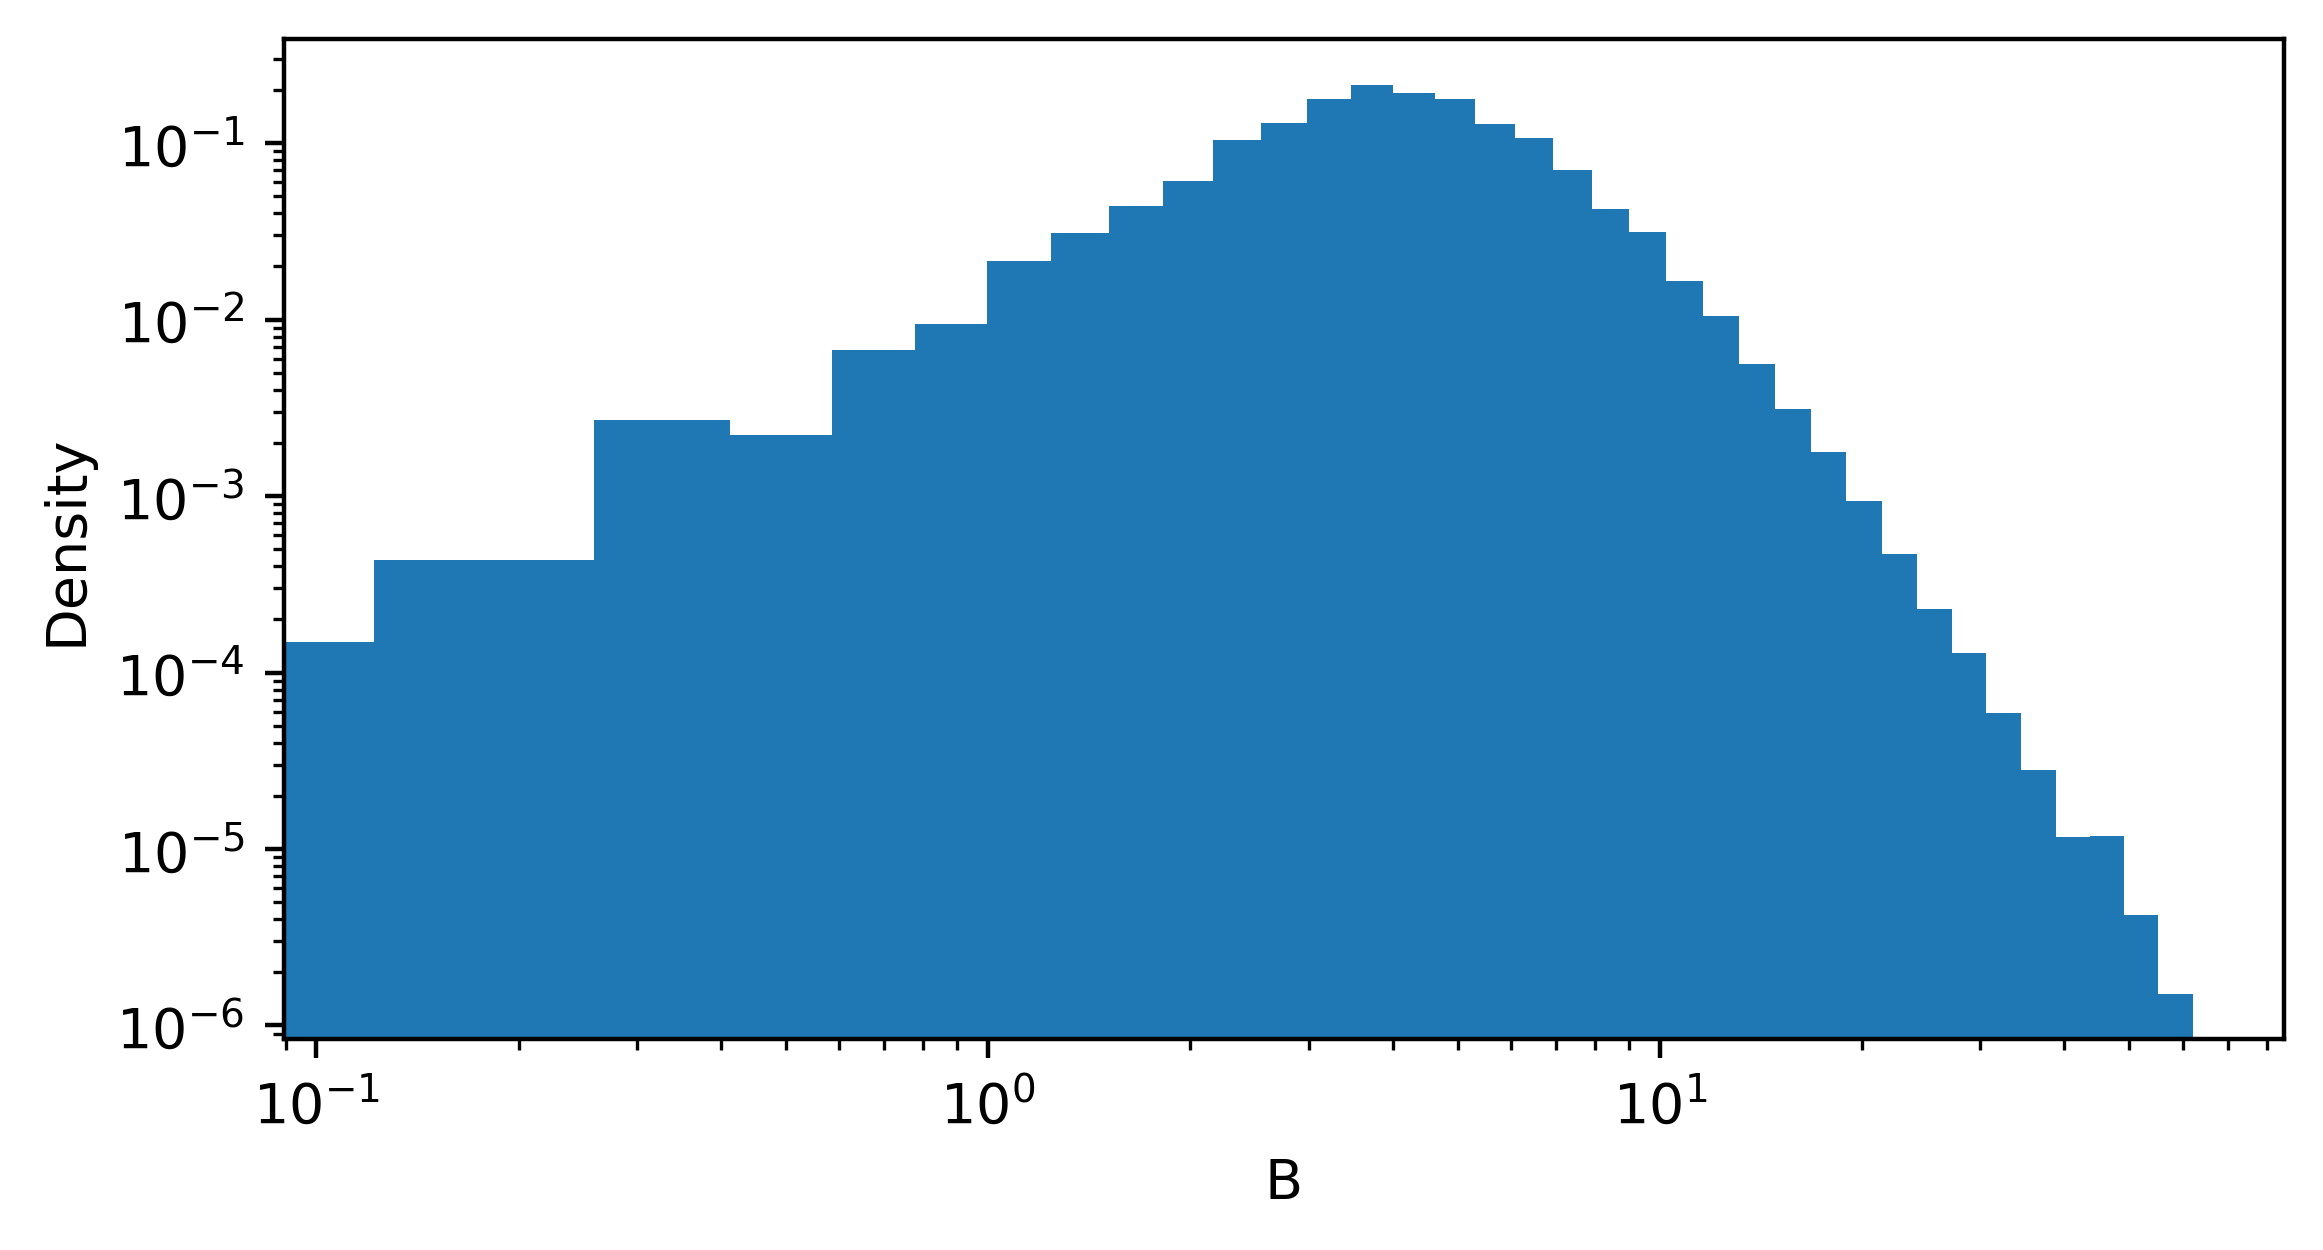

In [274]:
# Size definitions
dpi = 400
pxx = 2000   # Horizontal size of each panel
pxy = 1000   # Vertical size of each panel

nph = 2     # Number of horizontal panels
npv = 1     # Number of vertical panels 

# Padding
padv  = 0  #Vertical padding in pixels
padv2 = 0  #Vertical padding in pixels between panels
padh  = 0 #Horizontal padding in pixels at the edge of the figure
padh2 = 50  #Horizontal padding in pixels between panels

# Figure sizes in pixels
fszv = (npv*pxy + 2*padv + (npv-1)*padv2 )      #Vertical size of figure in pixels
fszh = (nph*pxx + 2*padh + (nph-1)*padh2 )      #Horizontal size of figure in pixels

# Conversion to relative units
ppxx   = pxx/fszh      # Horizontal size of each panel in relative units
ppxy   = pxy/fszv      # Vertical size of each panel in relative units
ppadv  = padv/fszv     #Vertical padding in relative units
ppadv2 = padv2/fszv    #Vertical padding in relative units
ppadh  = padh/fszh     #Horizontal padding the edge of the figure in relative units
ppadh2 = padh2/fszh    #Horizontal padding between panels in relative units


var = '|B|'
var = 'B'

dl = 0.05
lim = np.log10(np.max(Omni[var]))
bins = np.power(10, np.arange(0, lim + dl, dl))
bins = bins - 1

## Start Figure
fig = plt.figure(figsize=(fszh/dpi,fszv/dpi), dpi = dpi)
ax1 = fig.add_axes([ppadh, ppadv, ppxx, ppxy])
ax1.hist(Omni[var], bins=bins, density=True)
ax1.set_xscale('log')
ax1.set_yscale('log')
ax1.set_ylabel('Density')
ax1.set_xlabel(var)


array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1.])

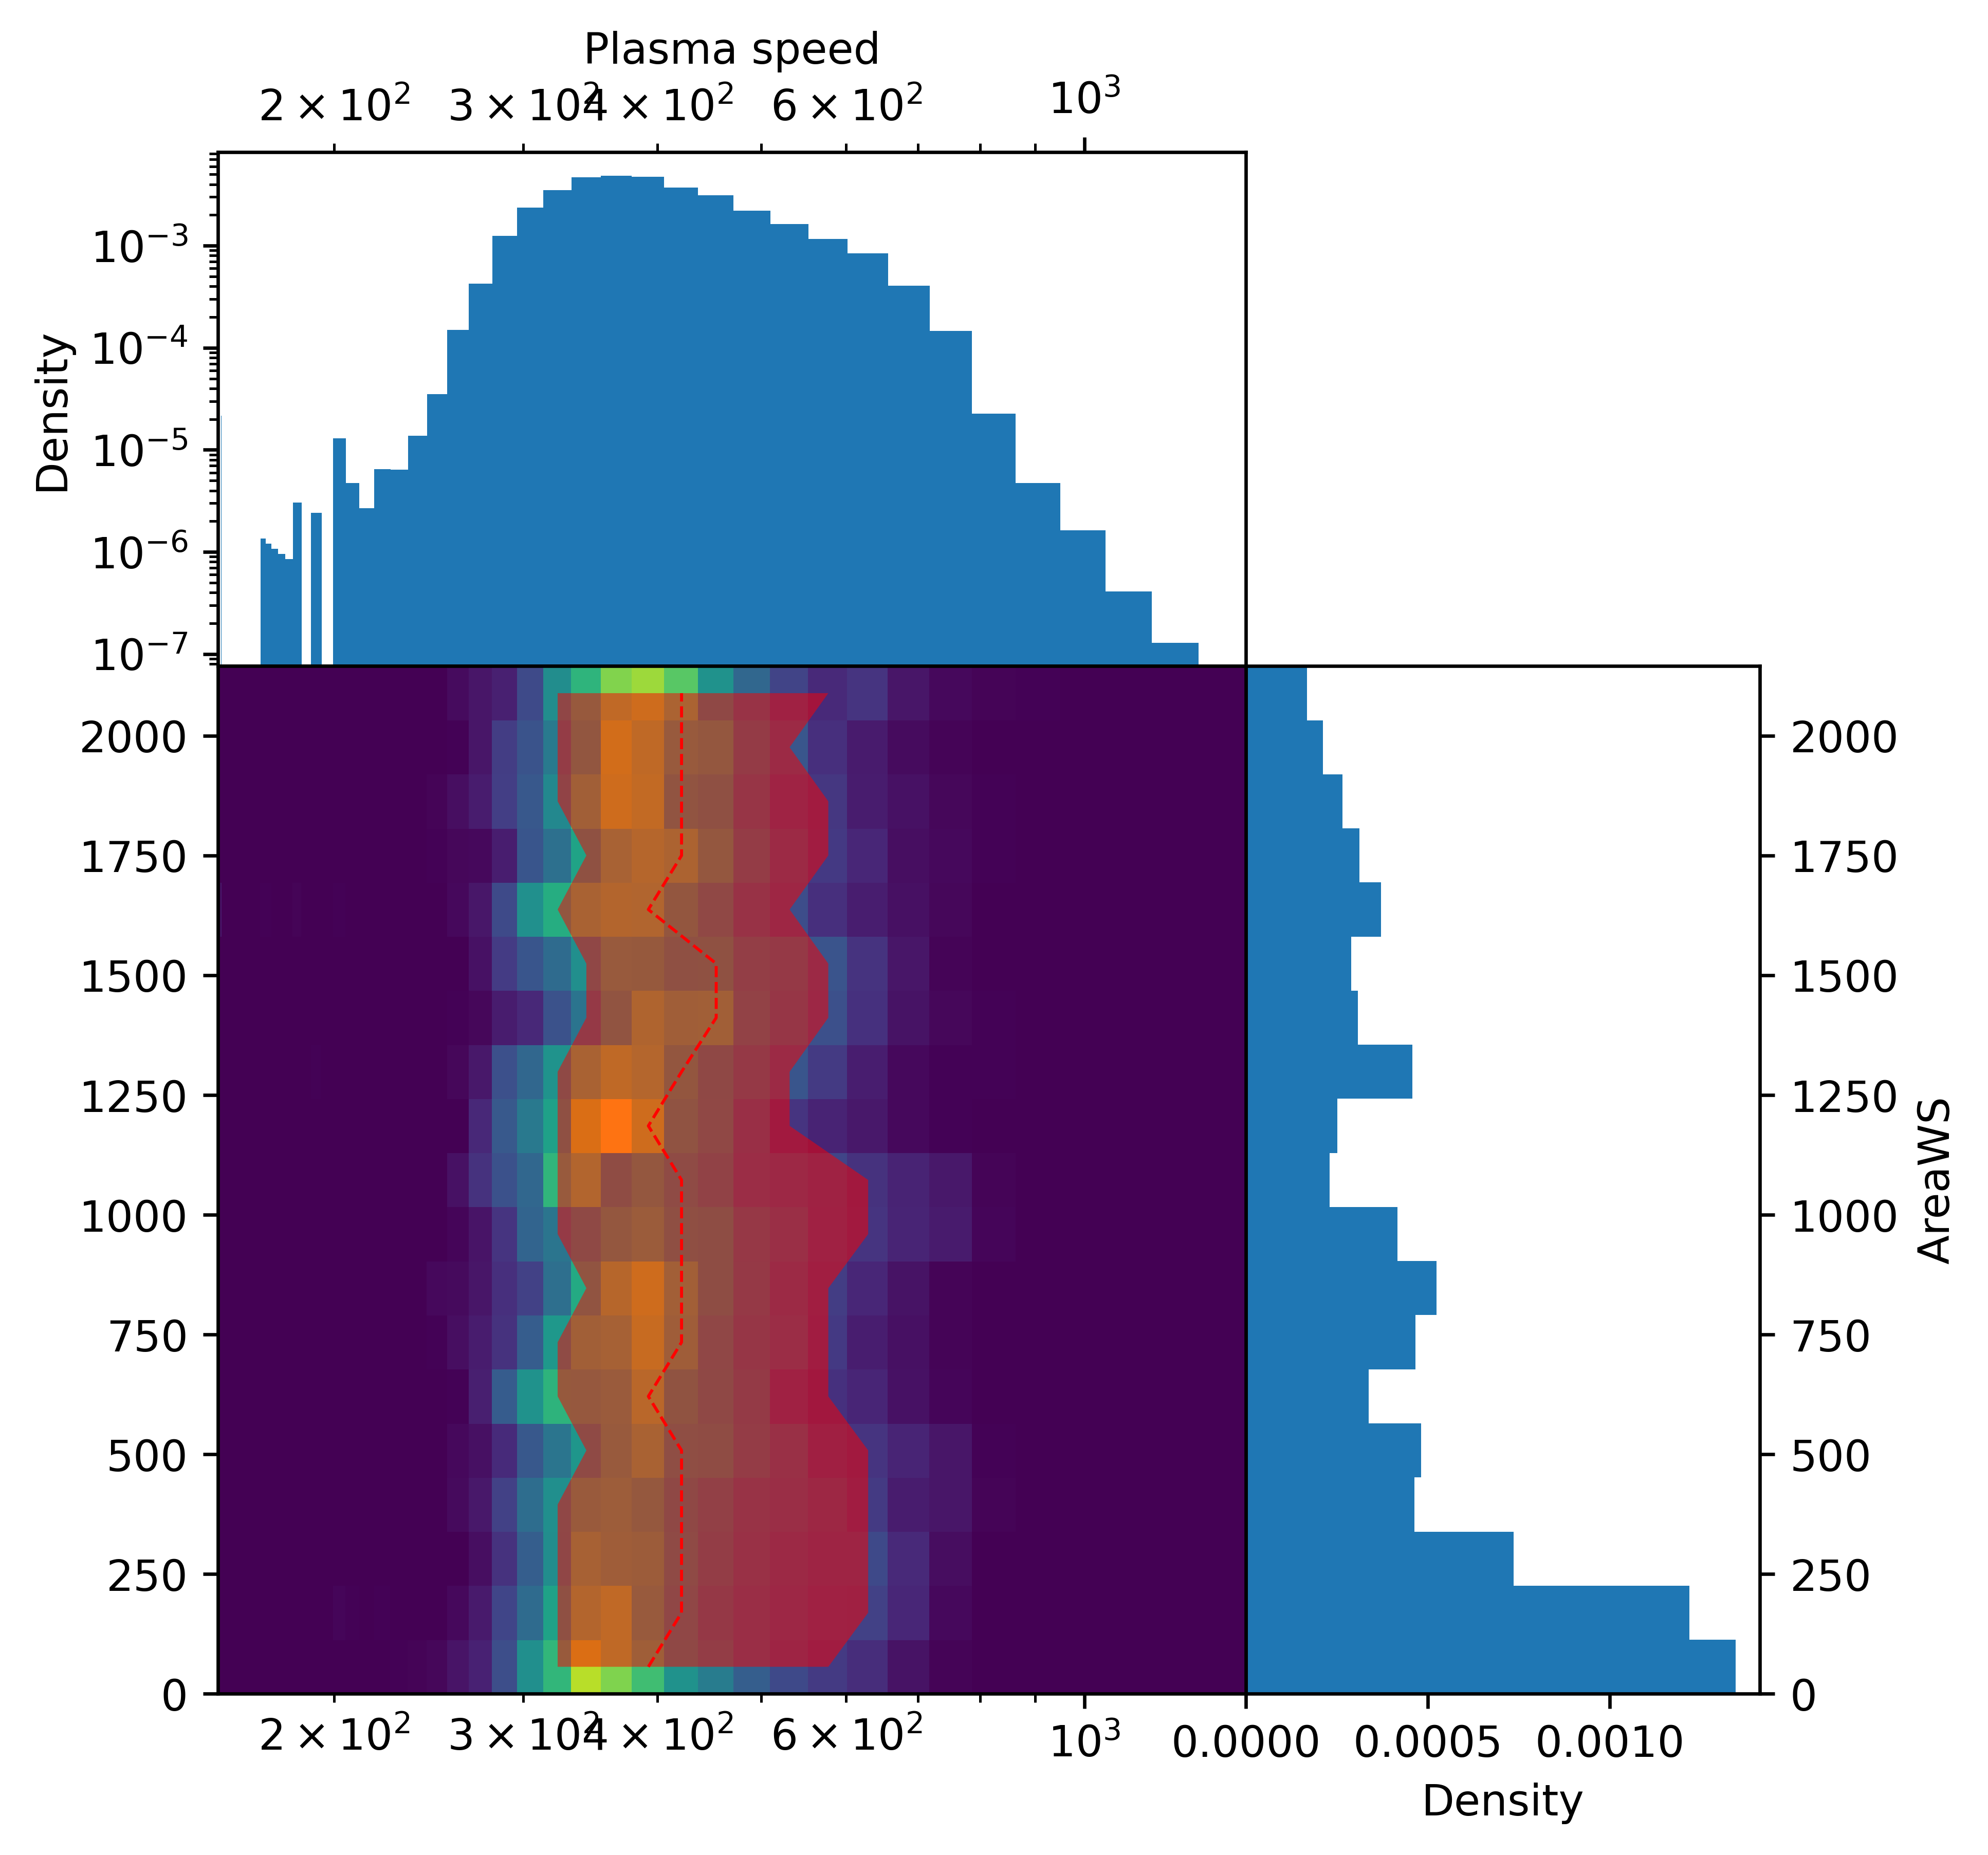

In [282]:
# Size definitions
dpi = 600
pxx = 2000   # Horizontal size of each panel
pxy = 2000   # Vertical size of each panel

nph = 2     # Number of horizontal panels
npv = 1     # Number of vertical panels 

# Padding
padv  = 0  #Vertical padding in pixels
padv2 = 0  #Vertical padding in pixels between panels
padh  = 0 #Horizontal padding in pixels at the edge of the figure
padh2 = 50  #Horizontal padding in pixels between panels

# Figure sizes in pixels
fszv = (npv*pxy + 2*padv + (npv-1)*padv2 )      #Vertical size of figure in pixels
fszh = (nph*pxx + 2*padh + (nph-1)*padh2 )      #Horizontal size of figure in pixels

# Conversion to relative units
ppxx   = pxx/fszh      # Horizontal size of each panel in relative units
ppxy   = pxy/fszv      # Vertical size of each panel in relative units
ppadv  = padv/fszv     #Vertical padding in relative units
ppadv2 = padv2/fszv    #Vertical padding in relative units
ppadh  = padh/fszh     #Horizontal padding the edge of the figure in relative units
ppadh2 = padh2/fszh    #Horizontal padding between panels in relative units


var = '|B|'
var = 'B'
var = 'Plasma speed'

dl = 0.05
lim = np.log10(np.max(Omni[var]))
bins = np.power(10, np.arange(0, lim + dl, dl))
bins = bins - 1+np.min(Omni[var])
widths = (bins[1:]-bins[0:-1])
centers = (bins[1:]+bins[0:-1])/2

var2 = 'AreaWS'
nbins = 20
bins2 = np.linspace(0,1,nbins)*np.max(Omni[var2])
widths2 = (bins2[1:]-bins2[0:-1])
centers2 = (bins2[1:]+bins2[0:-1])/2

hist = np.histogram2d(Omni[var2],Omni[var], bins=[bins2,bins])
x, y = np.meshgrid(widths,widths2,indexing='xy')
# norm_tox = hist[0]/x/np.repeat(np.nansum(hist[0], axis=0)[None,:], x.shape[0], axis=0)
norm_tox = hist[0]/x/np.repeat(np.nansum(hist[0], axis=1)[:,None], x.shape[1], axis=1)
# norm_tox = hist[0]/x/np.repeat(np.nansum(hist[0], axis=1)[:,None], x.shape[1], axis=1)
# norm_tox = hist[0]/y/np.repeat(np.nansum(hist[0], axis=1)[:,None], x.shape[1], axis=1)
# norm_tox = hist[0]/y/np.repeat(np.nansum(hist[0], axis=0)[None, :], x.shape[0], axis=0)

cdf_tox = np.nancumsum(norm_tox*x, axis=1)


## Start Figure
fig = plt.figure(figsize=(fszh/dpi,fszv/dpi), dpi = dpi)

ax1 = fig.add_axes([ppadh, ppadv+ppxy, ppxx, ppxy/2])
ax1.hist(Omni[var], bins=bins, density=True)
ax1.set_xscale('log')
ax1.set_yscale('log')
ax1.set_ylabel('Density')
ax1.set_xlabel(var)
ax1.xaxis.tick_top()
ax1.xaxis.set_label_position('top') 


ax2 = fig.add_axes([ppadh+ppxx, ppadv, ppxx/2, ppxy])
ax2.hist(Omni[var2], bins=bins2, density=True, orientation='horizontal')
# ax2.set_xscale('log')
# ax2.set_yscale('log')
ax2.set_xlabel('Density')
ax2.set_ylabel(var2)
ax2.yaxis.tick_right()
ax2.yaxis.set_label_position('right')




ax3 = fig.add_axes([ppadh, ppadv, ppxx, ppxy], sharex=ax1, sharey=ax2)

xpl, ypl = np.meshgrid(bins,bins2)
ax3.pcolormesh(bins,bins2,norm_tox);
# ax3.pcolormesh(xpl,ypl,norm_tox, vmin=0, vmax = 0.1);
# ax3.pcolormesh(xpl,ypl,norm_tox, vmin=0, vmax = 0.1);
# ax3.pcolormesh(bins,bins2,hist[0]);

expected = np.nansum(norm_tox*x*np.repeat(centers[None,:],norm_tox.shape[0],axis=0) , axis=1)
# ax3.plot(expected, centers2, linestyle='--', color='#ffa232', linewidth=0.7)


index = np.sum(cdf_tox<=0.5,axis=1)
index[index==index.shape[0]] -= 1
median = centers[index]


p1 = 0.9
p2 = 0.1

index = np.sum(cdf_tox<=p1,axis=1)
index[index==index.shape[0]] -= 1
per1 = centers[index]

index = np.sum(cdf_tox<=p2,axis=1)
index[index==index.shape[0]] -= 1
per2 = centers[index]

ax3.plot(median, centers2, linestyle='--', color='r', linewidth=0.7)
ax3.fill_betweenx(centers2, per1, per2, fc='r', alpha=0.5, ec='None')



np.nansum(norm_tox*x, axis=1)

In [264]:
np.nancumsum(norm_tox*x, axis=1)

array([[7.73275595e-05, 1.35323229e-04, 5.41292917e-04, 8.89266935e-04,
        2.99644293e-03, 6.05088153e-03, 1.47888958e-02, 3.06410455e-02,
        5.73963811e-02, 9.60214971e-02, 1.73387720e-01, 2.65252861e-01,
        3.84085988e-01, 5.29732447e-01, 6.53127900e-01, 7.61483143e-01,
        8.36916177e-01, 8.99648160e-01, 9.37036035e-01, 9.60195639e-01,
        9.77942314e-01, 9.87086298e-01, 9.92557222e-01, 9.95572997e-01,
        9.97042221e-01, 9.98105475e-01, 9.99323384e-01, 9.99845345e-01,
        9.99961336e-01, 1.00000000e+00, 1.00000000e+00, 1.00000000e+00,
        1.00000000e+00, 1.00000000e+00, 1.00000000e+00, 1.00000000e+00],
       [0.00000000e+00, 8.20310898e-05, 2.46093269e-04, 4.30663221e-04,
        9.43357533e-04, 2.31737829e-03, 6.84959600e-03, 1.49706739e-02,
        2.99208400e-02, 5.54325089e-02, 1.07911899e-01, 1.76120750e-01,
        2.79397892e-01, 4.13231615e-01, 5.43414954e-01, 6.69394200e-01,
        7.61535622e-01, 8.41926090e-01, 8.96210164e-01, 9.32180

In [214]:
np.repeat(np.nansum(hist[0], axis=1)[:,None], x.shape[1], axis=1).shape

(19, 36)

In [246]:
np.nansum(norm_tox*x, axis=1)

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1.])

In [261]:
np.repeat(np.nansum(hist[0], axis=1)[:,None], x.shape[1], axis=1)

array([[51728., 51728., 51728., 51728., 51728., 51728., 51728., 51728.,
        51728., 51728., 51728., 51728., 51728., 51728., 51728., 51728.,
        51728., 51728., 51728., 51728., 51728., 51728., 51728., 51728.,
        51728., 51728., 51728., 51728., 51728., 51728., 51728., 51728.,
        51728., 51728., 51728., 51728.],
       [48762., 48762., 48762., 48762., 48762., 48762., 48762., 48762.,
        48762., 48762., 48762., 48762., 48762., 48762., 48762., 48762.,
        48762., 48762., 48762., 48762., 48762., 48762., 48762., 48762.,
        48762., 48762., 48762., 48762., 48762., 48762., 48762., 48762.,
        48762., 48762., 48762., 48762.],
       [26815., 26815., 26815., 26815., 26815., 26815., 26815., 26815.,
        26815., 26815., 26815., 26815., 26815., 26815., 26815., 26815.,
        26815., 26815., 26815., 26815., 26815., 26815., 26815., 26815.,
        26815., 26815., 26815., 26815., 26815., 26815., 26815., 26815.,
        26815., 26815., 26815., 26815.],
       [19660

In [ ]:
np.nansum(norm_tox*x , axis=1).shape

In [145]:
np.repeat(centers[None,:],norm_tox.shape[0],axis=0)

array([[ 0.46100923,  0.59047193,  0.73573148, ..., 46.79354129,
        52.57642794, 59.06493348],
       [ 0.46100923,  0.59047193,  0.73573148, ..., 46.79354129,
        52.57642794, 59.06493348],
       [ 0.46100923,  0.59047193,  0.73573148, ..., 46.79354129,
        52.57642794, 59.06493348],
       ...,
       [ 0.46100923,  0.59047193,  0.73573148, ..., 46.79354129,
        52.57642794, 59.06493348],
       [ 0.46100923,  0.59047193,  0.73573148, ..., 46.79354129,
        52.57642794, 59.06493348],
       [ 0.46100923,  0.59047193,  0.73573148, ..., 46.79354129,
        52.57642794, 59.06493348]])